<a href="https://colab.research.google.com/github/soph1125/Computational-Physics/blob/main/Sophia_Pavia_Lab07_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [ ]:
# import your modules here
import math
import matplotlib.pyplot as plt
import numpy as np


# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [ ]:
# write your function here
def trap(x_vals,y_vals):
  area = 0
  for i in range(1,len(x_vals)):

    trap_area = 0.5 * ((y_vals[i] + y_vals[i-1]) * (x_vals[i] - x_vals[i-1]))
    area += trap_area

  return area



# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [ ]:
# write your function mycircle here
def mycircle(x, radius=2):

  y_values = np.sqrt(radius**2 - x**2)

  return y_values


### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [ ]:
x_values = np.linspace(-2, 2, 100)
y_values = mycircle(x_values)

In [ ]:
x_values[1] - x_values[0]

0.04040404040404044

### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [ ]:
area = trap(x_values, y_values)

print(f"Area under the half circle: {area:.5f}")


Area under the half circle: 6.27644


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**YOUR ANSWER HERE**



In [ ]:
x_values = np.linspace(-2, 2, 1000)
y_values = mycircle(x_values)

In [ ]:
area = trap(x_values, y_values)

print(f"Area under the half circle: {area:.5f}")


Area under the half circle: 6.28297


# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [ ]:
def mygauss(x, mean, sigma):
    exponent = -0.5 * ((x - mean) / sigma)**2

    gauss_function = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(exponent)

    return gauss_function

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [ ]:
mean_value = 0
sigma_value = 1

x_values_gaussian_1sigma = np.linspace(-sigma_value, sigma_value, 100)
y_values_gaussian_1sigma = mygauss(x_values_gaussian_1sigma, mean_value, sigma_value)

area_1sigma = trap(x_values_gaussian_1sigma, y_values_gaussian_1sigma)

print(f"Area under the Gaussian between -1sigma and 1sigma: {area_1sigma:.5f}")

known1=0.682
percent_error1 = np.absolute(known1 - area_1sigma) / (known1) * 100
print(f"Percent error from -1sigma to 1sigma is : {percent_error1:.2f}")


Area under the Gaussian between -1sigma and 1sigma: 0.68267
Percent error from -1sigma to 1sigma is : 0.10


Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [ ]:
mean_value = 0
sigma_value = 1

x_values_gaussian_2sigma = np.linspace(-2*sigma_value, 2*sigma_value, 100)
y_values_gaussian_2sigma = mygauss(x_values_gaussian_2sigma, mean_value, sigma_value)

area_2sigma = trap(x_values_gaussian_2sigma, y_values_gaussian_2sigma)

print(f"Area under the Gaussian between -2sigma and 2sigma: {area_2sigma:.5f}")

known2=0.272+0.682
percent_error2 = np.absolute(known2 - area_2sigma) / (known2) * 100
print(f"Percent error from -2sigma to 2sigma is : {percent_error2:.2f}")


Area under the Gaussian between -2sigma and 2sigma: 0.95447
Percent error from -2sigma to 2sigma is : 0.05


Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [ ]:
mean_value = 0
sigma_value = 1

x_values_gaussian_3sigma = np.linspace(-3*sigma_value, 3*sigma_value, 100)
y_values_gaussian_3sigma = mygauss(x_values_gaussian_3sigma, mean_value, sigma_value)

area_3sigma = trap(x_values_gaussian_3sigma, y_values_gaussian_3sigma)

print(f"Area under the Gaussian between -3sigma and 3sigma: {area_3sigma:.5f}")


known3=0.272+0.682+0.042
percent_error3 = np.absolute(known3 - area_3sigma) / (known3) * 100
print(f"Percent error from -3sigma to 3sigma is : {percent_error3:.2f}")


Area under the Gaussian between -3sigma and 3sigma: 0.99729
Percent error from -3sigma to 3sigma is : 0.13


# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [ ]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapezoid
# set up x and y arrays for the half circle
x_values_halfcirc = np.linspace(-2,2,100)
y_values_halfcirc = mycircle(x_values_halfcirc)
# call scipy.integrate.trapezoid to perform the integration
area_halfcirc = trapezoid(y_values_halfcirc, x_values_halfcirc)
# print your result and the expected answer in a formatted print statement
print(f"Used scipy.integrate.trapezoid for the half circle:")
print(f"area = {area_halfcirc:.5f}")
print(f"Expected answer for the half circle: {area:.5f}")

Used scipy.integrate.trapezoid for the half circle:
area = 6.27644
Expected answer for the half circle: 6.28297


In [ ]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapezoid
# set up x and y arrays for the gaussian
x_values_gauss = np.linspace(-sigma_value, sigma_value, 100)
y_values_gauss = mygauss(x_values_gauss, mean_value, sigma_value)
# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
area = trapezoid(y_values_gauss, x_values_gauss)
# print your result and the expected answer in a formatted print statement
print(f"Used scipy.integrate.trapezoid for the integration between -sigma and sigma:")
print(f"area = {area:.5f}")
print(f"Expected answer for the gauss is : {area_1sigma:.5f}")

Used scipy.integrate.trapezoid for the integration between -sigma and sigma:
area = 0.68267
Expected answer for the gauss is : 0.68267


In [ ]:
print(area_1sigma)

0.6826730329991482


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



In [ ]:
# your monte carlo function here
def mcintegrate(function, x_range, y_range, visualize=False):
    x_random = np.random.uniform(low=-2, high=2, size=10000)
    y_random = np.random.uniform(low=0, high=2, size=10000)

    func_values = function(x_random)

    if visualize:
      plt.plot(x_random, y_random, 'o', color='blue', markersize=3, label='Random Points')
      plt.plot(x_random[func_values >= y_random], y_random[func_values >= y_random], 'o', color='red', markersize=3,label='Points Below Curve')
      x_curve = np.linspace(x_range[0], x_range[1], 1000)
      plt.plot(x_curve, function(x_curve), color='black', linewidth=2, label='Function')
      plt.title(f'Monte Carlo Integration and Its Estimated Area: {area:.5f}')
      plt.xlabel('x')
      plt.ylabel('y')
      plt.legend()
      plt.show()

    return area


### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

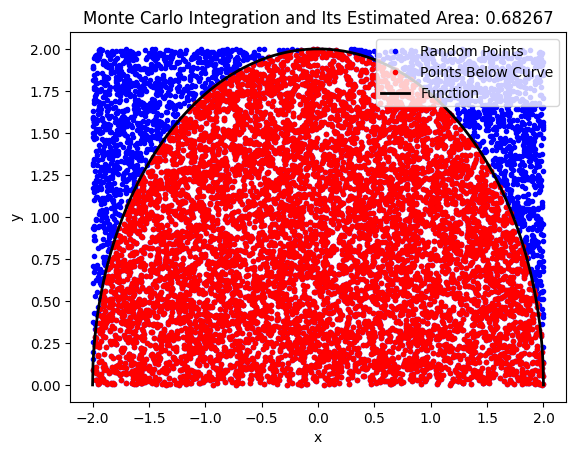

The Monte Carlo estimates the area for the half circle to be: 0.68267


In [ ]:
# your code to calculate the area of a half circle using monte carlo
x_values_halfcirc = np.linspace(-2, 2, 100)
y_values_halfcirc = mycircle(x_values_halfcirc)
area_mc = mcintegrate(mycircle, [-2, 2], [0, 2], visualize=True)
print(f"The Monte Carlo estimates the area for the half circle to be: {area_mc:.5f}")
